In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from featurizer import Featurizer
import seaborn as sns
sns.set_context("notebook")

In [2]:
train = pd.read_csv('data/8254_clean_acute_toxic.csv')
test = pd.read_csv('data/2579_test_clean.csv')

In [7]:
train.head()

,smiles,acute_toxic,cano_smiles
0,C=1(C(=C(C(C=1Cl)(C2(C(=C(C(=C2Cl)Cl)Cl)Cl)Cl)...,0,ClC1=C(Cl)C(Cl)(C2(Cl)C(Cl)=C(Cl)C(Cl)=C2Cl)C(...
1,C13(C4(C2(C5(C(C1(C2(Cl)Cl)Cl)(C3(C(C45Cl)(Cl)...,1,ClC1(Cl)C2(Cl)C3(Cl)C4(Cl)C(Cl)(Cl)C5(Cl)C3(Cl...
2,O=P(OC(=CBr)c1ccc(cc1Cl)Cl)(OC)OC,1,COP(=O)(OC)OC(=CBr)c1ccc(Cl)cc1Cl
3,O=C(OC)C(Cc1ccc(cc1)Cl)Cl,0,COC(=O)C(Cl)Cc1ccc(Cl)cc1
4,O=C(O)CCCOc1ccc(cc1Cl)Cl,0,O=C(O)CCCOc1ccc(Cl)cc1Cl


In [3]:
featu = Featurizer()
X = np.vstack([featu(s) for s in train.cano_smiles.values])
y = train.acute_toxic.values

In [10]:
clf = RandomForestClassifier()

In [11]:
clf.fit(X,y)

RandomForestClassifier()

In [12]:
clf.score(X,y)

0.9996365398594621

In [13]:
tx = np.vstack([featu(s) for s in test.cano_smiles.values])
ty = test.acute_toxic.values

In [14]:
y_pre = clf.predict(tx)
clf.score(tx,ty)

0.833656455990694

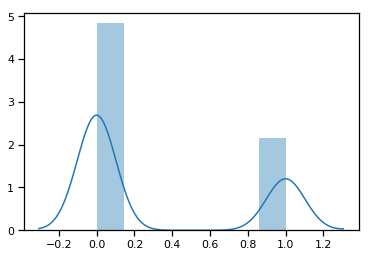

In [20]:
sns.distplot(ty)

In [21]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(15,15)})
%matplotlib inline
import umap

In [32]:
reducer = umap.UMAP(n_neighbors=15,metric='jaccard',n_components=2)

In [33]:
embedding = reducer.fit_transform(X)

/home/yanglikun/anaconda3/envs/attentive/lib/python3.6/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


In [10]:
import matplotlib.pyplot as plt

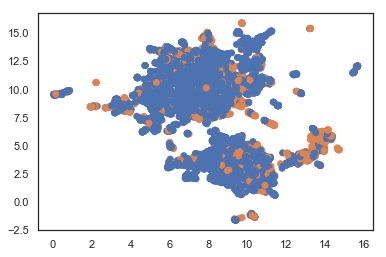

In [34]:
plt.scatter(embedding[:,0],embedding[:,1],c=[sns.color_palette()[i] for i in train.acute_toxic])